En este ejercicio, aplicarás los modelos PCA y SOM a dos conjuntos de datos distintos del conjunto de datos de plantas de iris. 

Utilizarás un conjunto de datos para cada modelo.

Resumen del ejercicio:
Selección de conjuntos de datasos: Elija dos conjuntos de datos diferentes para trabajar. Asegúrese de que estos conjuntos de datos sean distintos del conjunto de datos de plantas de iris.
Aplicación del modelo PCA: Aplique el modelo PCA a uno de los conjuntos de datos seleccionados. Comprender el proceso de reducción de la dimensionalidad y cómo funciona el modelo PCA en este contexto.


## Carga de modulos y dataset

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

  
wine = load_wine(as_frame=True)

df = wine.frame

print('Original Dataframe Shape: ',df.shape)

X = df[wine['feature_names']]
print('Inputs Dataframe Shape: ',X.shape)

Original Dataframe Shape:  (178, 14)
Inputs Dataframe Shape:  (178, 13)


## Preprocesamiento de datos

In [3]:
X_mean = X.mean()

print(X_mean)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


In [4]:
X_std = X.std()
print(X_std)

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64


In [5]:
Z = (X - X_mean) / X_std
print(Z) 

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.514341   -0.560668  0.231400          -1.166303   1.908522   
1    0.245597   -0.498009 -0.825667          -2.483841   0.018094   
2    0.196325    0.021172  1.106214          -0.267982   0.088110   
3    1.686791   -0.345835  0.486554          -0.806975   0.928300   
4    0.294868    0.227053  1.835226           0.450674   1.278379   
..        ...         ...       ...                ...        ...   
173  0.873810    2.966176  0.304301           0.300954  -0.331985   
174  0.491955    1.408636  0.413653           1.049555   0.158126   
175  0.331822    1.739837 -0.388260           0.151234   1.418411   
176  0.208643    0.227053  0.012696           0.151234   1.418411   
177  1.391162    1.578712  1.361368           1.498716  -0.261969   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.806722    1.031908             -0.657708         1.221438   
1         0.567048    0.7

## Calcular la matriz de covarianza y visualizacion

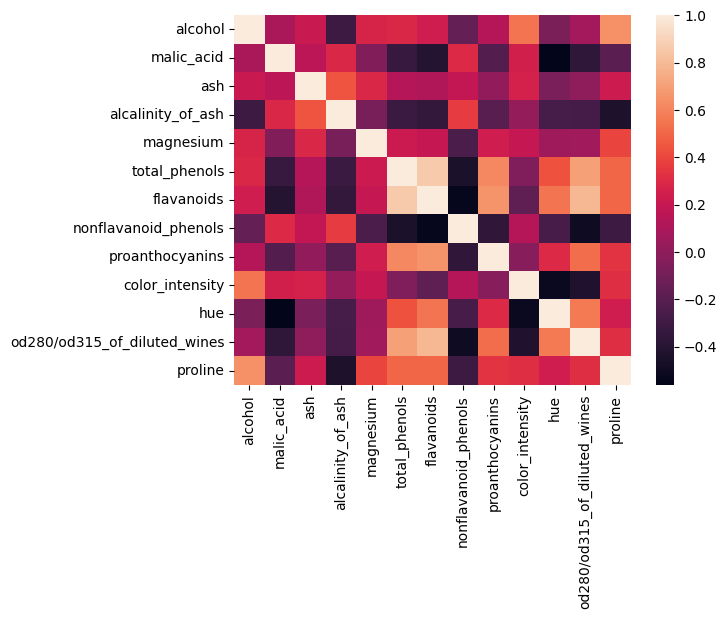

In [6]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


## Calcular los eigenvalores y los eigenvectores por cada uno de los rasgos

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]
Eigen values Shape: (13,)
Eigen Vector Shape: (13, 13)


## Ordenar eigenvalores y eigenvectores

In [8]:

idx = eigenvalues.argsort()[::-1]


eigenvalues = eigenvalues[idx]


eigenvectors = eigenvectors[:,idx]

## Suma acumulativa de eigenvalores

In [9]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

## Extraemos el numero de componentes que garanticen el 50% de la info

In [10]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

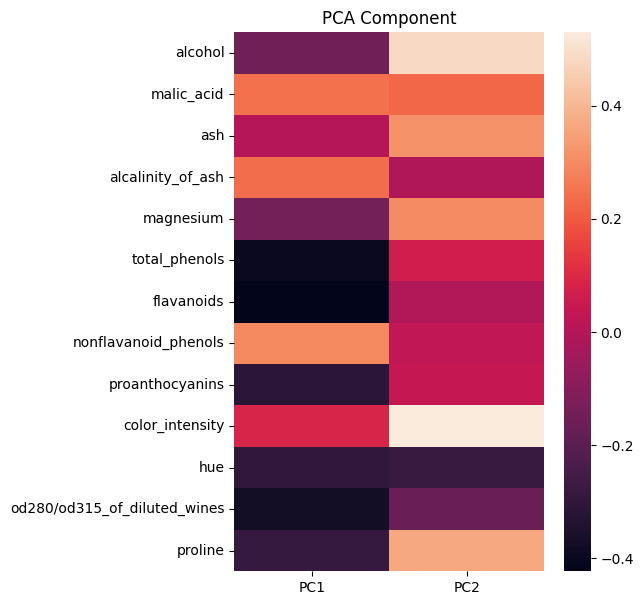

In [11]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = wine['feature_names'],
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [12]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)


         PCA1      PCA2
0   -3.307421  1.439402
1   -2.203250 -0.332455
2   -2.509661  1.028251
3   -3.746497  2.748618
4   -1.006070  0.867384
..        ...       ...
173  3.361043  2.210055
174  2.594637  1.752286
175  2.670307  2.753133
176  2.380303  2.290884
177  3.199732  2.761131

[178 rows x 2 columns]


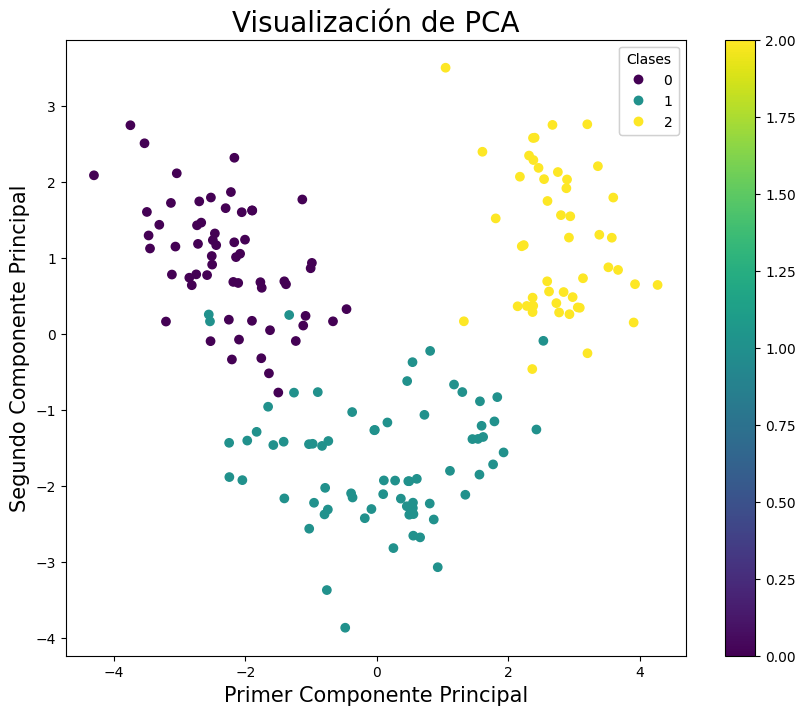

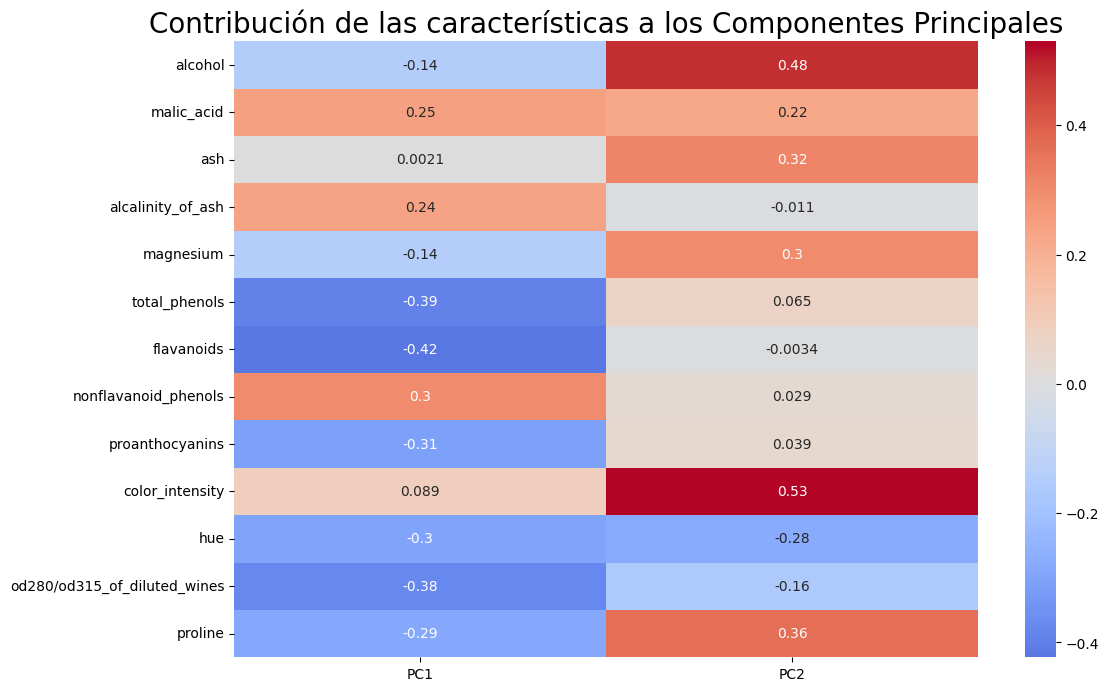

In [15]:
# Crear el gráfico
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_pca['PCA1'], Z_pca['PCA2'], c=wine['target'], cmap='viridis')

# Añadir títulos y etiquetas
plt.title('Visualización de PCA', fontsize=20)
plt.xlabel('Primer Componente Principal', fontsize=15)
plt.ylabel('Segundo Componente Principal', fontsize=15)

# Añadir una barra de color
plt.colorbar(scatter)

# Añadir una leyenda
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clases")
plt.gca().add_artist(legend1)

# Mostrar el gráfico
plt.show()

# Si quieres ver la contribución de cada característica original a los componentes principales
plt.figure(figsize=(12, 8))
sns.heatmap(pca_component, annot=True, cmap='coolwarm', center=0)
plt.title('Contribución de las características a los Componentes Principales', fontsize=20)
plt.show()